<a href="https://colab.research.google.com/github/RafaelGirardin/Sprint_Engenharia_de_Dados/blob/master/MVP_Sprint_Engenharia_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pós-graduação em Ciência de Dados e Analytics**

---

## MVP de Engenharia de Dados

### Autor: Rafael M. G. P. Furtado


## 1. Objetivo


O debate público sobre as variadas formas de violência contra a mulher suscita no Brasil diferentes posicionamentos tanto quanto à definição dos modelos de proteção às agressões por gênero como também à própria validação da misoginia como um problema social urgente a ser enfrentado.

Conforme dados da Ouvidoria Nacional dos Direitos Humanos¹, de janeiro de 2022 até julho do mesmo ano, somaram-se 31 mil denúncias de violências física, sexual, psicológica, moral e patrimonial contra a mulher. Também é notória a extensa subnotificação desses dados, conforme apontam pesquisas sociológicas².

Não obstante a um cenário tão complexo, soma-se ao contexto a dificuldade na eficácia dos mecanismos de proteção a mulher, especialmente no que se refere à aplicação justa das leis, dentre elas a lei 11.340/2006 (Lei "Maria da Penha"), lei 12.737/2012 (Lei "Carolina Dieckman") e lei 14.132/2021 (Lei do "Stalking").

Num sistema judiciário em que a ampla maioria dos juízes são homens, especialmente quando se consideram os mais elevados cargos da magistratura, cogita-se a hipótese do enviesamento na aplicação das referidas leis.

**Assim, tem-se como objetivo do MVP o estudo de setenças judiciais sobre agressões motivadas por gênero (no âmbito da violência doméstica) e o levantamento de possíveis vieses na decisão dos magistrados. É importante esclarecer que a busca por associação entre eventos não implica obrigatoriamente numa relação de causalidade, de modo que não se discute a qualidade da decisão judicial. Os resultados desse trabalho devem ser vistos como indícios para estudos futuros. Ressalta-se ainda que utilizamos o recorte de um tribunal específico (TJSP), o qual pode não ser representativo do panorama geral brasileiro.**

Para esse trabalho, preferiu-se montar uma Base de Dados própria, baseada em Web Scraping, a partir da página de jurisprudências do Tribunal de Justiça do Estado de São Paulo. Na abordagem em Web Scraping, foi utilizado Selenium e a linguagem C# para a automatização das consultas. Por se tratarem de dados públicos e por inexistir indicativo de proibição do uso de robôs na página principal de buscas, não foi identificado conflito ético quanto a esse mecanismo. O código-fonte dos crawlers está disponível para consulta no mesmo repositório do notebook.

De forma mais detalhada, as perguntas que se desejam responder ao final do MVP são:

1.   Em que medida há mais homens desembargadores do que desembargadoras julgando processos de violência doméstica contra a mulher?
2.   É possível identificar alguma associação entre o gênero do magistrado e a setença proferida? Podemos conjecturar que homens juízes apresentam tendência a decisões mais favoráveis aos réus e juízas, uma tendência mais favorável à condenação deles?
3.   Em que medida as setenças condenatórias na primeira instância são alteradas parcial ou totalmente quando chegam no segundo nível de jurisdição?

## 2. Coleta dos dados

Conforme foi antecipado na seção anterior, o MVP não utilizou uma base de dados pública. Não foi identificado na Web um repositório público de dados com finalidade semelhante a desejada. Assim, a coleta foi feita por meio de Web Scraping, técnica popularmente conhecida como "navegação por robôs".

Utilizou-se o framework Selenium, juntamente com drivers fornecidos pela Microsoft para conexão com o navegador Edge. C# foi a linguagem empregada para programar o comportamento geral do robô. No repositório do notebook consta toda a implementação do código-fonte. Abaixo, é fornecido o link com um vídeo demonstrando a automatização das consultas:

*   https://youtu.be/lqXfnccrrDQ

Na página de busca das jurisprudências, foram utilizados os seguintes filtros:

*   Ementa: "Recurso defensivo"
*   Assunto: "12194 - Contra a mulher"
*   Origem: "2º grau"
*   Tipo de publicação: "Acórdãos" ou "Decisões monocráticas"
*   Ordenar por: "Data de publicação"

**Decisões categorizadas como "Recursos defensivos" representam apelações de decisão condenatória do reu em primeira instância. Desta forma, se o recurso for provido, saberemos que se trata, na verdade, de uma absolvição ou atenuação da pena anteriormente aplicada. O TJSP disponibiliza um código específico para processos relacionados à violência doméstica contra a mulher (código "12194" no campo "Assunto"). Decidiu-se coletar tanto decisões monocráticas, quanto as colegiadas. No caso das colegiadas, o juiz com o primeiro voto vencedor é relator da decisão.**

Abaixo, tem-se um print da página de buscas com os parâmetros citados:

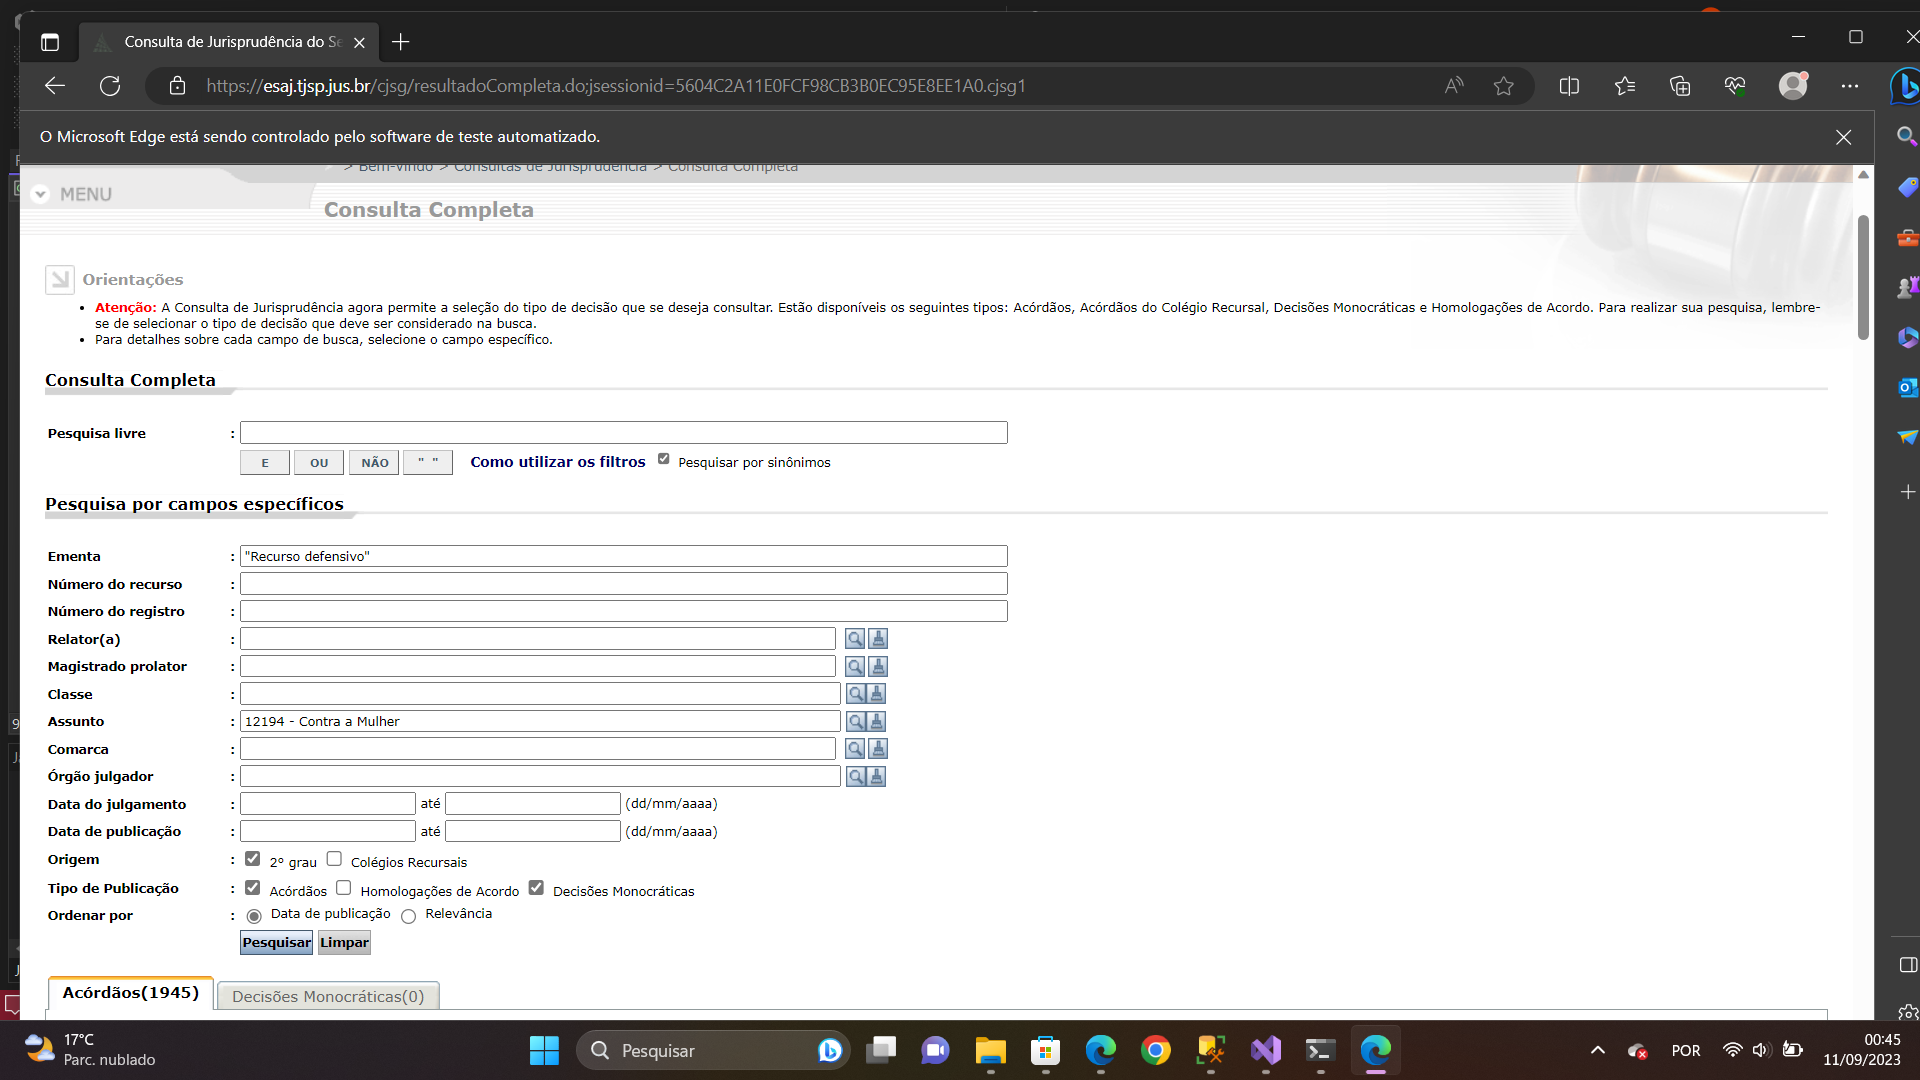

### 2.1. Persistência local

Conforme o robô de buscas navegava pelas decisões, elas eram incorporadas a um Banco de Dados Relacional local, baseado em SQL Server. O Script executado para a criação desse banco local consta no link abaixo:

*   https://drive.google.com/file/d/1MA2N-7g-8AogpJE-oJOV2x51xXXYdzXJ/view?usp=sharing

Pela leitura do script, percebe-se que a modelagem dos dados foi feita utilizando-se apenas duas tabelas, a saber: tabelas "Decisao" e "Relator".
A tabela "Decisao" possui seis colunas, enquanto que a de "Relator" possui apenas duas. São elas:

*   Decisão
    1. Id: tipo *int*, autoincrementável, chave primária da instância.
    2. Ementa: tipo *varchar* de comprimento 4000, com restrição "Unique", já que não se espera que decisões diferentes tenham a mesma ementa.
    3. Assunto: tipo *nvarchar*. Trata-se da categoria aplicada pelo TJSP para agrupar decisões sobre assuntos semelhantes.
    4. Publicação: tipo *DateTime*. Trata-se da data de publicação da decisão.
    5. NomeRelatorId: tipo *nvarchar*. É chave estrangeira que aponta para a tabela Relator. Trata-se do nome do juiz que redigiu a setença. Como o número de juízes de um tribunal não é muito grande, não se espera a homomínia entre relatores diferentes.
    6. Comarca: tipo *nvarchar*. Trata-se da comarca em que tramitou o processo.

*   Relator:
    1. NomeRelatorId: tipo *nvarchar*, é chave primária da instância. Como foi dito acima, corresponde ao nome do magistrado.
    2. Sexo: tipo *nvarchar* de comprimento igual a 1. Abriga os caracteres "F", no caso de juízas e "M", no caso de juízes. Esse atributo foi acrescentado manualmente na Base, por meio de Updates. Os valores incorporados a cada linha foram pesquisados na área de biografia dos juízes do TJSP.

Ao final, obtivemos 1433 instâncias na tabela "Decisão" e 56 na tabela "Relator".

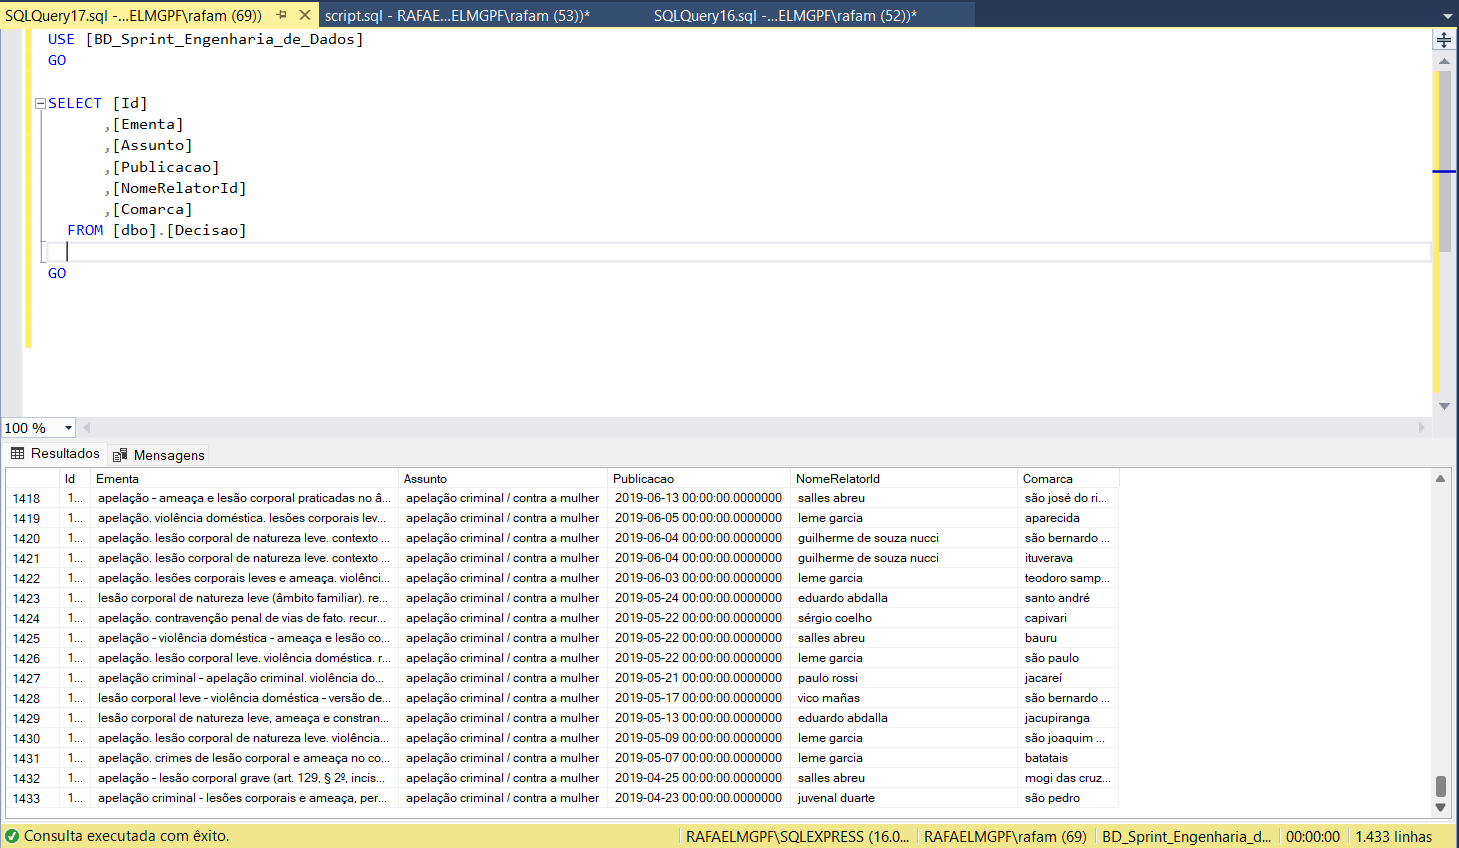


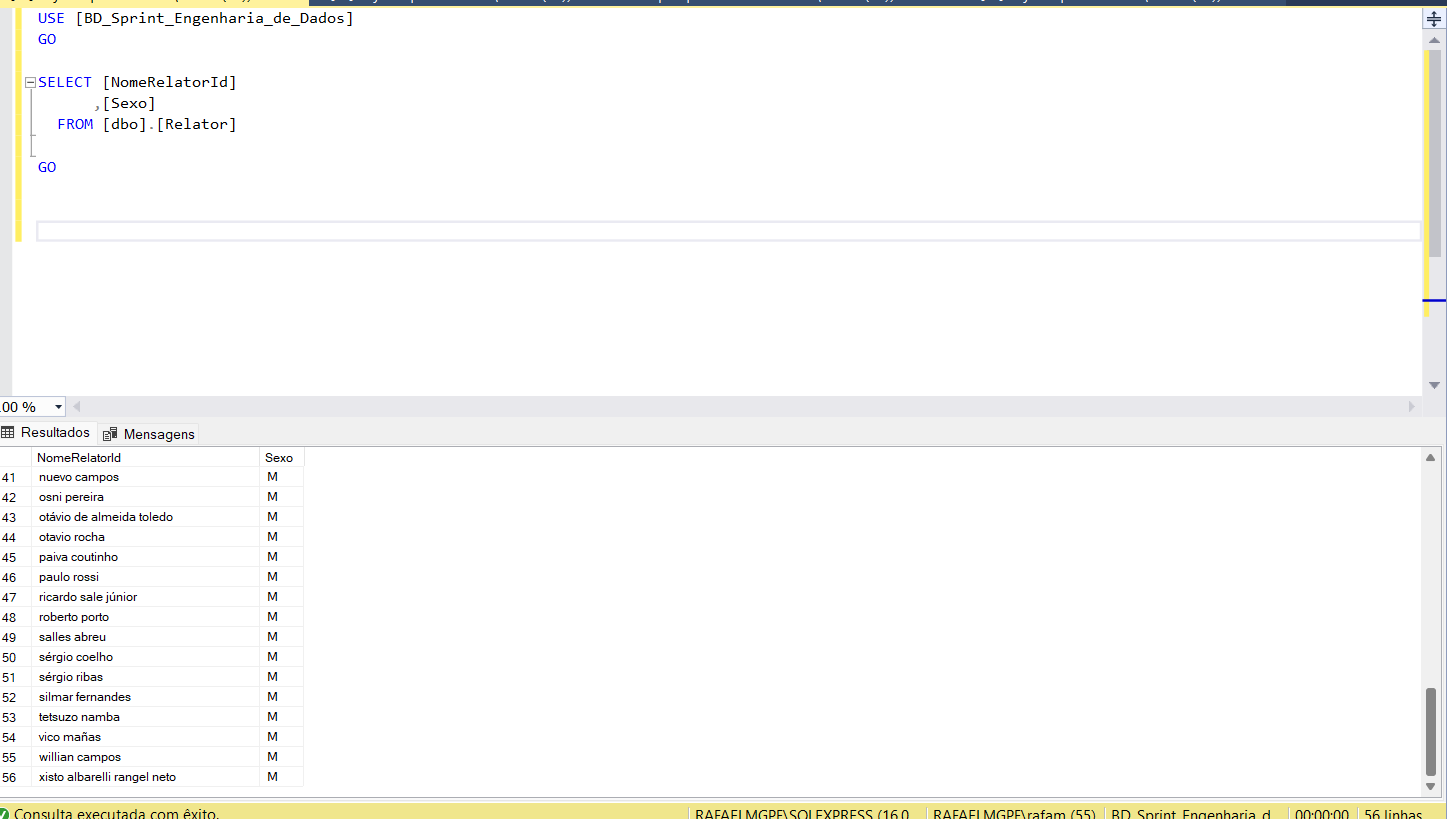

Com o link abaixo é possível fazer download do arquivo de backup contendo todo o Banco de Dados local produzido:

https://drive.google.com/file/d/1oICHFTJOgl9lL55IfRnv032p9NMTm-u9/view?usp=sharing

### 2.2. Persistência na nuvem (S3 e entrada dos dados no Redshift)

A persistência das duas tabelas na nuvem da AWS foi concluída com êxito. Os arquivos locais foram convertidos para formato .csv e, em seguida, adicionados ao serviço S3 da Amazon, que é a implementação feita por essa empresa do sistema de arquivos distribuídos Hadoop-File-System. Particularmente, foi criada uma pasta específica dentro do S3 para guardar os dados das duas tabelas.
Observe no vídeo abaixo todo o processo percorrido:

*   https://youtu.be/lIqCX1ViOGk

Após o upload dos arquivos, foi criado um ambiente de Datawarehouse, por meio do serviço Redshift, também pertencente à AWS. Em seguida, um script SQL foi executado direto na interface de "Query Data". O objetivo do Script era a criação de duas tabelas vazias (inicialmente), as quais irão abrigar os dados provenientes dos Jobs do Amazon Glue, um terceiro serviço que será comentado em breve. O vídeo colocado no link abaixo também descreve todo o processo percorrido:

*   https://youtu.be/0hgfXvCdSjI

Para que o serviço Amazon Glue funcione corretamente e execute os Jobs, precisamos realizar configurações relacionadas à rede no ambiente Cloud, particularmente, a criação de conexão entre todos os serviços envolvidos e a definição de "roles" (permissões) de acesso. É necessário também o acréscimo de um Gateway na seção de Endpoints. O modo pelo qual todas essas configurações foram feitas é exibido no vídeo abaixo:

*   https://youtu.be/cFEK7X0Qt_I

Por fim, precisamos programar os Jobs, que irão carregar as tabelas do Redshift com os dados oriundos dos arquivos no S3. O primeiro Job se refere à carga de dados na tabela "Decisao". Todos os dados chegam do S3 como string, mas as colunas "Id" e "Publicacao" foram mapeadas para os tipos "int" e "date", respectivamente. O processo de carga de dados na tabela "Decisao" é mostrado no vídeo abaixo:

*   https://youtu.be/c3LShP1LagE

O segundo job traz para o Redshift os dados do arquivo .csv no S3 contendo informações sobre os relatores dos processos coletados. Após a finalização dos dois jobs, entrou-se no ambiente de "Query Data" para que pudéssemos conferir o resultado. Todas as tabelas foram preenchidas com os dados corretamente, o que pôde ser demonstrado com os comandos "Select \* from Decisao" e "Select \* from Relator". As colunas originais da tabela Decisao usadas no mapeamento dos dois atributos citados no último vídeo foram apagadas, ficando apenas os atributos mapeados. Veja no último vídeo dessa seção, como o procedimento foi feito:

*   https://youtu.be/FUqAMGWzHNI

## 3. Modelagem

Quando as tabelas em que estamos trabalhando pertenciam ao Banco de Dados Relacional Local, havia uma estruturação maior e um relacionamento entre elas, conforme já foi descrito anteriormente. Cada qual possuía uma chave primária, atributos fortemente tipados e a tabela "Decisão" possuía uma chave estrangeira apontando para a tabela Relator, além de uma restrição "Unique" no atributo "ementa".

No momento em que as tabelas chegam no ambiente Redshift, uma parte dessa estruturação é abandonada. A tipagem dos dados fica mais fraca e a indexação das tabelas perde sentido. Isso se deve ao fato de o Redshift não se comportar perfeitamente como uma Base de Dados Relacional. O ambiente distribuído aumenta a capacidade de processamento, mas impõe custos de rede. Provavelmente teria sido melhor juntar as duas tabelas numa única, dadas essas características. Ainda assim, tentaremos trabalhar a análise de dados na seção seguinte como se elas pertencessem a uma estrutura perfeitamente relacional.

A explicação da modelagem dos dados em ambiente local consta na *seção 2.1. Persistência Local*. Foi colocado inclusive o script SQL executado para alcançar esse resultado.

Nessa seção, nos concentraremos na modelagem dos dados em ambiente Cloud Redshift. Em suma, temos duas tabelas, "Relator" e "Decisão", contidas num mesmo schema, chamado "public". As tabelas não estão indexadas nem possuem um relacionamento explícito entre si. A tipagem dos dados foi modificada. Na tabela "Decisão", todos os campos são do tipo varchar tradicional (tamanho 256), exceto o campo "ementa", que é um varchar de tamanho 500 e os campos "id_int" e "publicacao_date", que foram mapeados para int e date. O atributo "ementa" pode conter uma longa sequência de caracteres e, consequentemente, de bytes. Assim, inicialmente houve problemas na execução do job usando o varchar default. Após perceber esse problema, a característica da coluna foi modificada para viabilizar cadeias maiores de caracteres. O campo mapeado "publicacao_date" abriga datas no formato aaaa-mm-dd.

Na tabela "Decisao", temos dois atributos varchar de tamanho padrão, "NomeRelatorId" e "Sexo". Abaixo, são mostradas evidências da descrição feita.


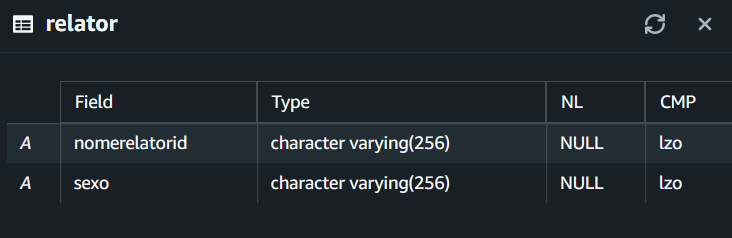

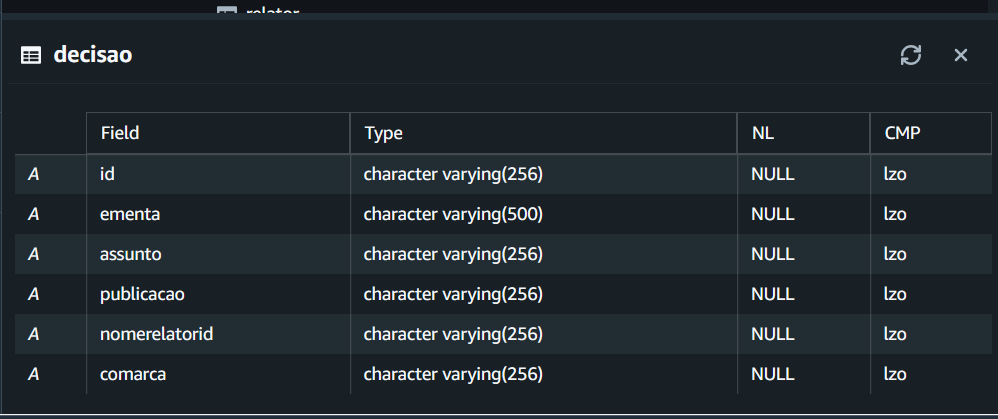

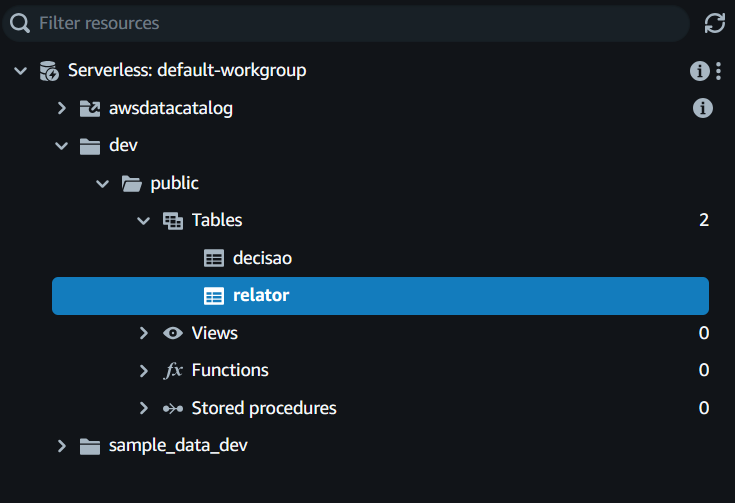



## 4. Análise de Dados

### 4.1. Qualidade dos dados

Considerando as duas tabelas do Banco, observamos que não há dados nulos.

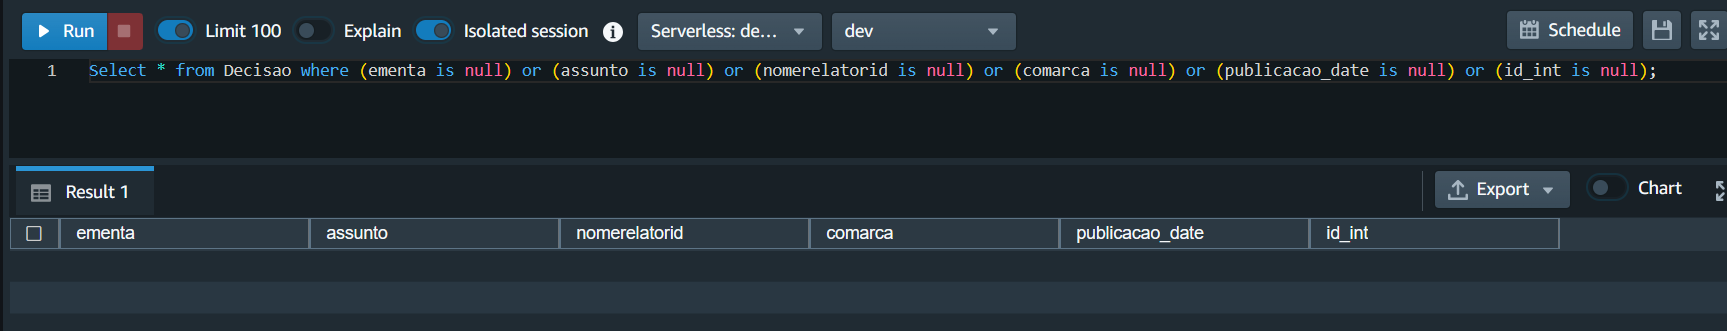


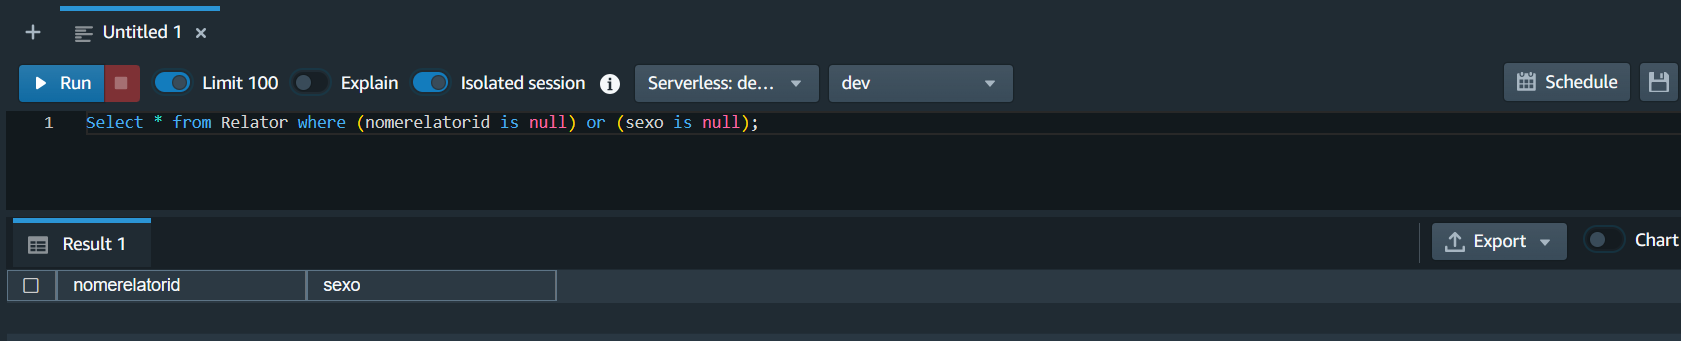


Os campos destinados a abrigar cadeia de caracteres também não apresentam strings vazias em nenhuma instância das duas tabelas.

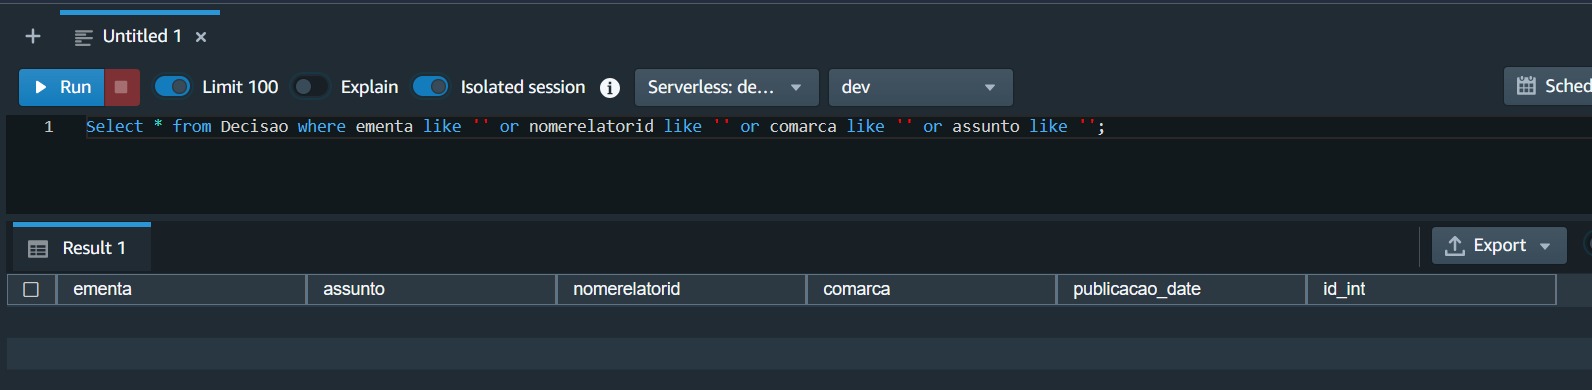

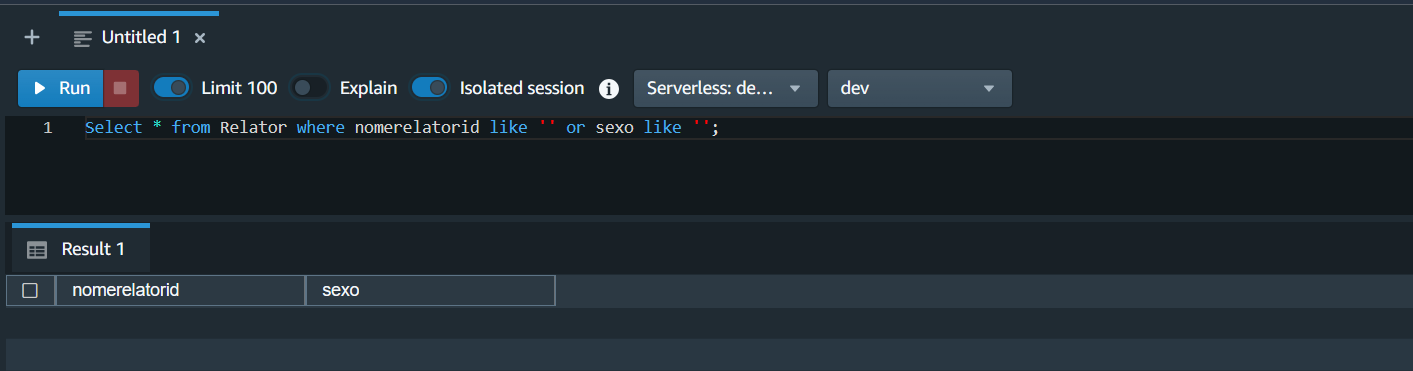

No campo "publicacao" da tabela "Decisão", encontramos 3 datas inconsistentes, correspondendo a 01/01/0001. Provavelmente, trata-se de algum erro de lançamento na própria página do tribunal, que produziu a aplicação do valor padrão '0001-01-01'.

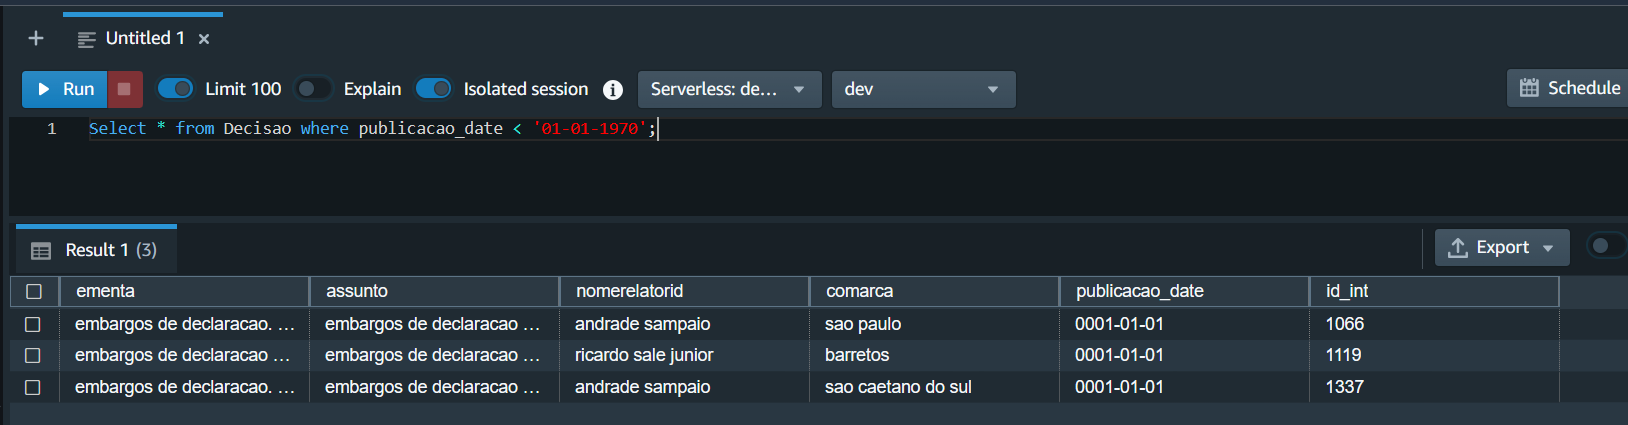


Pesquisamos ainda no campo "publicacao_date" a existência de datas no futuro, o que também representaria uma inconsistência. Não foi identificado esse tipo de erro.

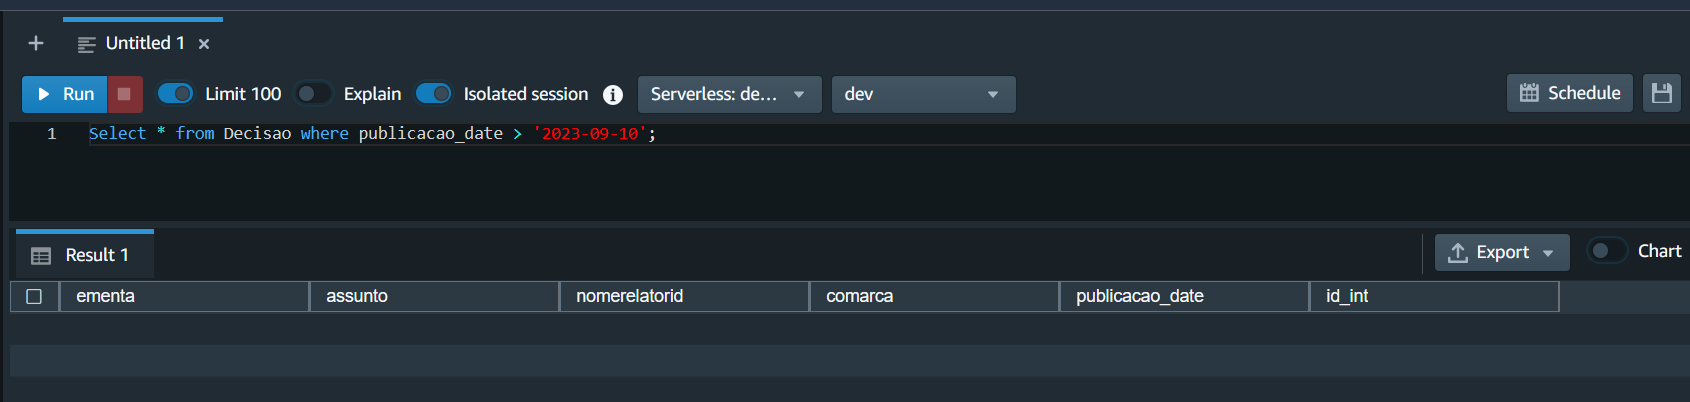



### 4.2. Levantamento de estatísticas

Na tabela "Decisão", podemos observar um total de 1433 instâncias. O número era de fato aquele esperado, porque todas as decisões do Banco Local deveriam subir para o Redshift. Veja o print abaixo.

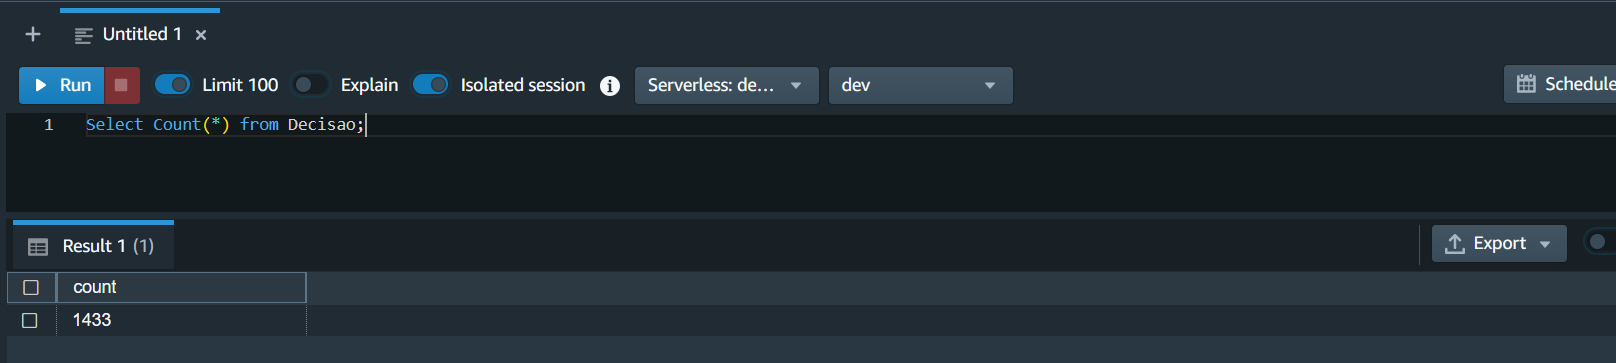

Na tabela Relator, obtivemos um total de 56 desembargadores(as) a relatar o julgamento de pelo menos um recurso defensivo. O número é o mesmo daquele do Banco de Dados Local, conforme esperado.

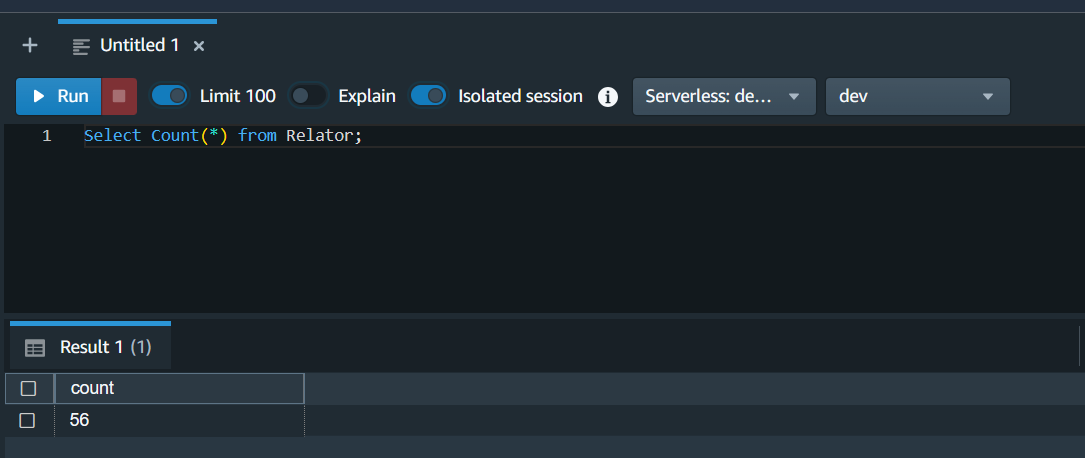

Também desejamos saber quantos(as) desembargadores(as) que relataram algum processo relacionado à violência doméstica eram homens e quantas eram mulheres. Obtivemos um total de 49 homens (87,5%) e apenas 7 mulheres (12,5%).

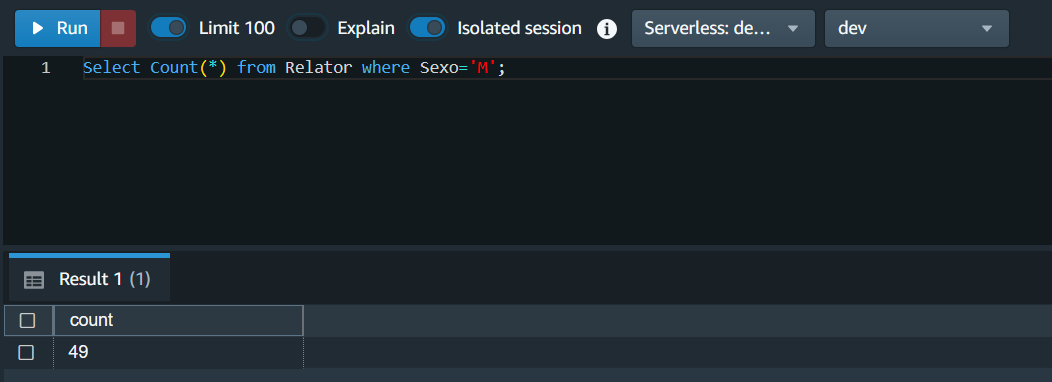

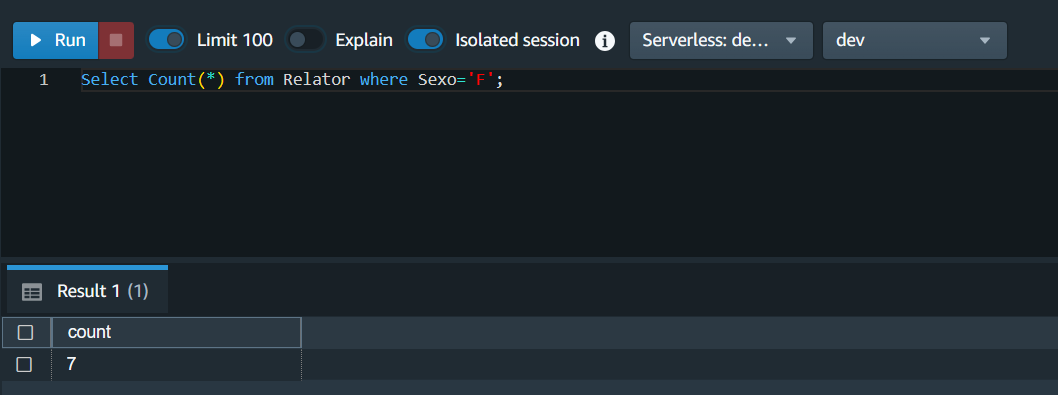

Queremos ter uma estimativa de quantas apelações dos reus foram providas ou parcialmente providas e quantas foram negadas. Conforme discutimos inicialmente, temos somente recursos defensivos no Banco de Dados. Um recurso defensivo provido ou parcialmente provido representa a anulação da pena do reu estabelecida na primeira instância ou, no mínimo, sua atenuação.

Para fazer a análise do provimento a partir das ementas, devemos nos lembrar que estamos lidando com a prévia de cada uma delas, pois o acesso à integralidade depende de resolução de Captcha. Assim, faremos o estudo somente das linhas que contiverem na ementa a sequência de caracteres "provido" ou "provimento", porque o desfecho dos outros processos pode não constar na prévia. Conforme se exibe abaixo, temos 532 recursos passíveis de análise.

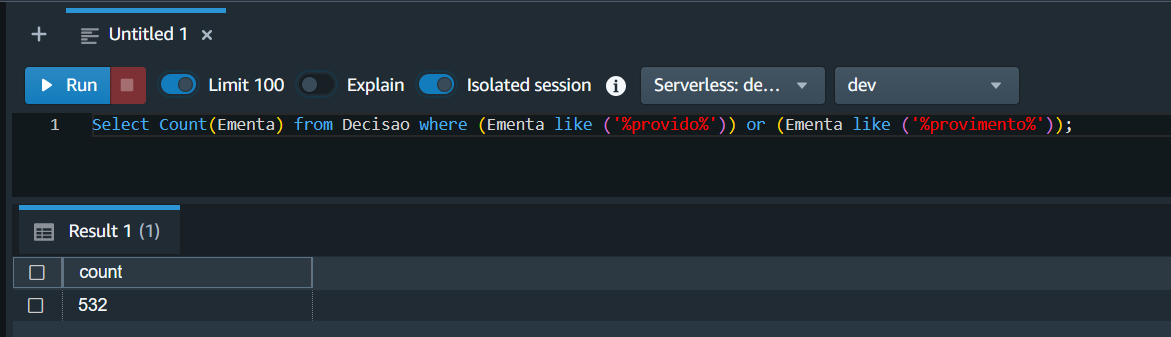

Passemos para a investigação dos recursos não providos, isto é, aqueles em que a condenação do reu foi mantida conforme a decisão da primeira instância. Temos 291 apelações com essa característica.

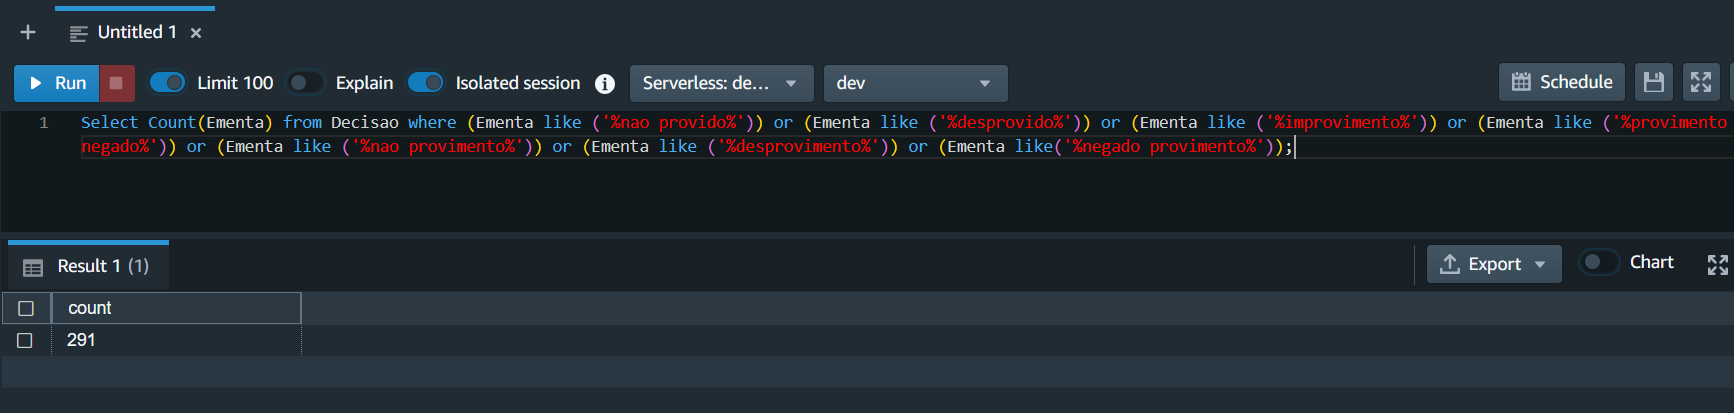

Façamos agora a análise de quantos recursos foram parcialmente providos. No screenshot abaixo, podemos verificar que, dentre todas as apelações, 111 foram parcialmente providas.

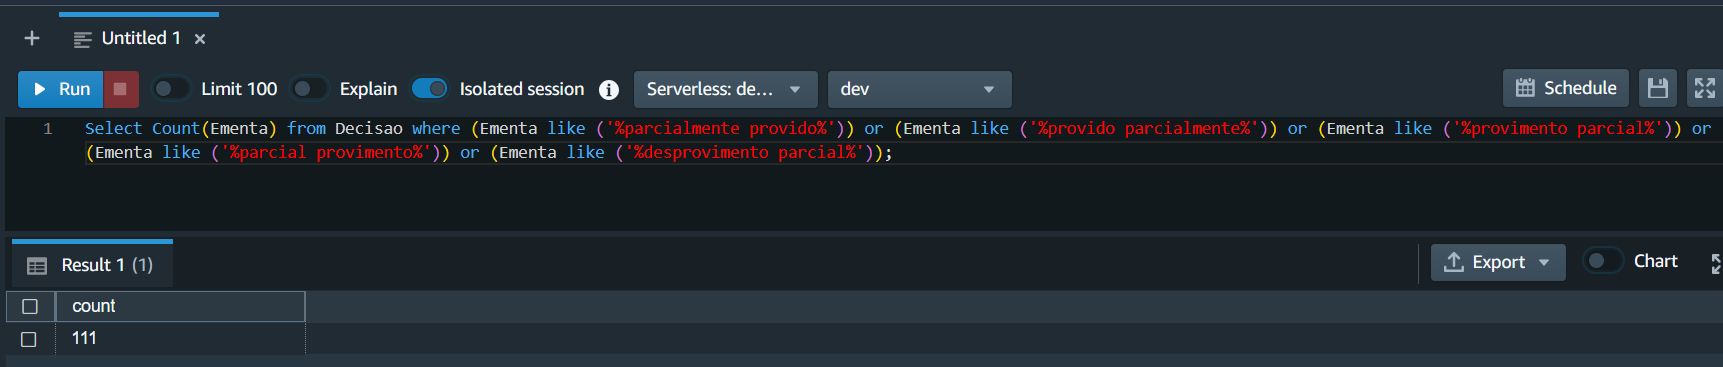

Considerando que os recursos aos quais foi dado provimento representam os 532 selecionados inicialmente exceto aqueles com provimento parcial ou negado, constatamos 130 recursos deferidos, em conformidade com o que indica a query abaixo.

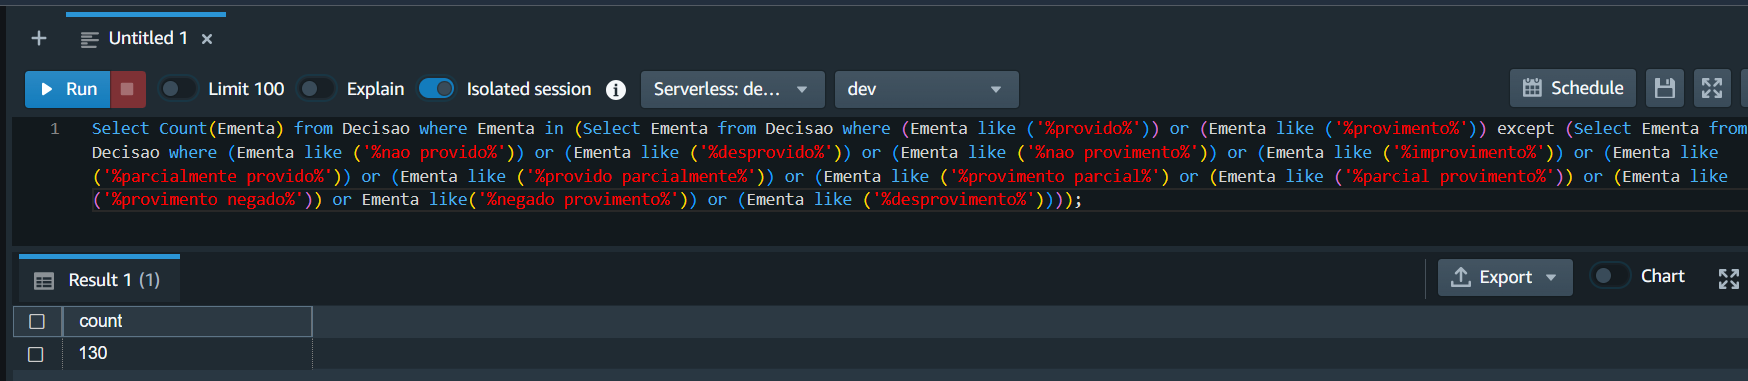

Tentemos responder à pergunta sobre uma eventual existência de viés nas decisões dos magistrados conforme o gênero. Nessa análise, é importante considerar que, do total de juízes(a) que relataram alguma sentença, apenas 7,5% são mulheres. Além disso, constatamos que, no grupo dos 532 processos analisados, uma proporção ainda menor (22 ou 4%) tiveram sentença efetivamente proferida por uma magistrada. Temos, portanto, um desbalanceamento significativo.

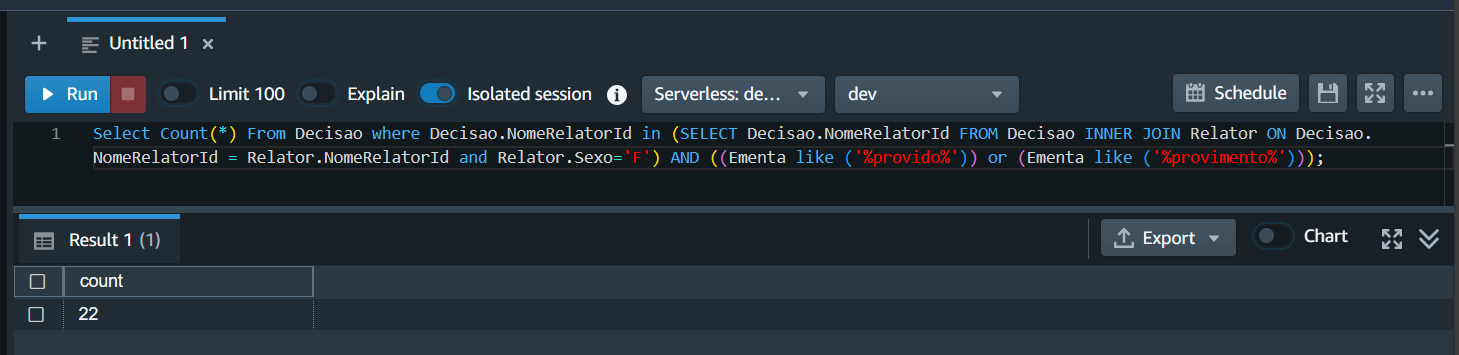

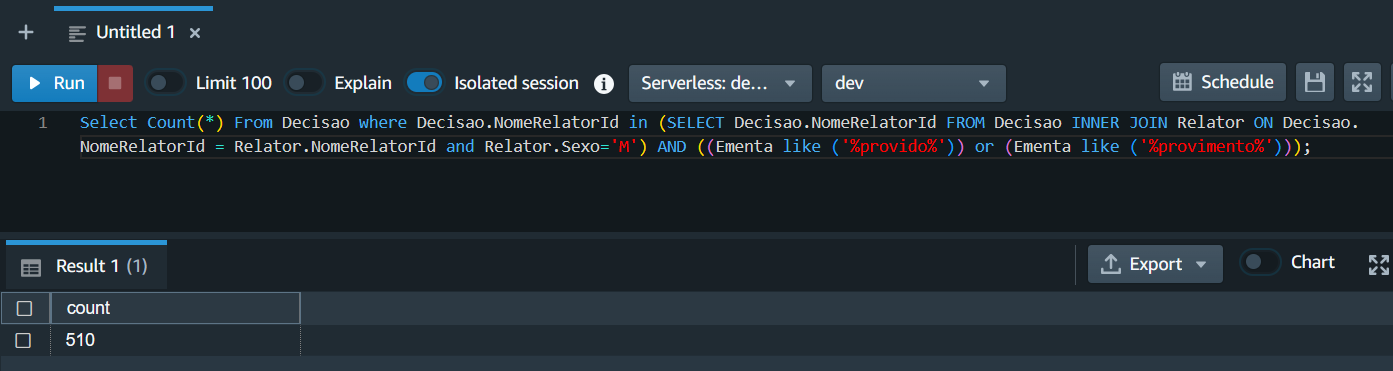

Conforme é observado na sequência de prints abaixo, temos que:

*   19 recursos defensivos foram negados por uma magistrada (6,5% do total de 291 negados)
*   272 recursos defensivos foram negados por um magistrado (93,5% do total de 291 negados)
*   2 recursos defensivos foram parcialmente providos por uma juíza (1,8% do total de 111 parcialmente providos)
*   109 recursos defensivos foram parcialmente providos por um juiz (98,2% do total de 111 parcialmente providos)


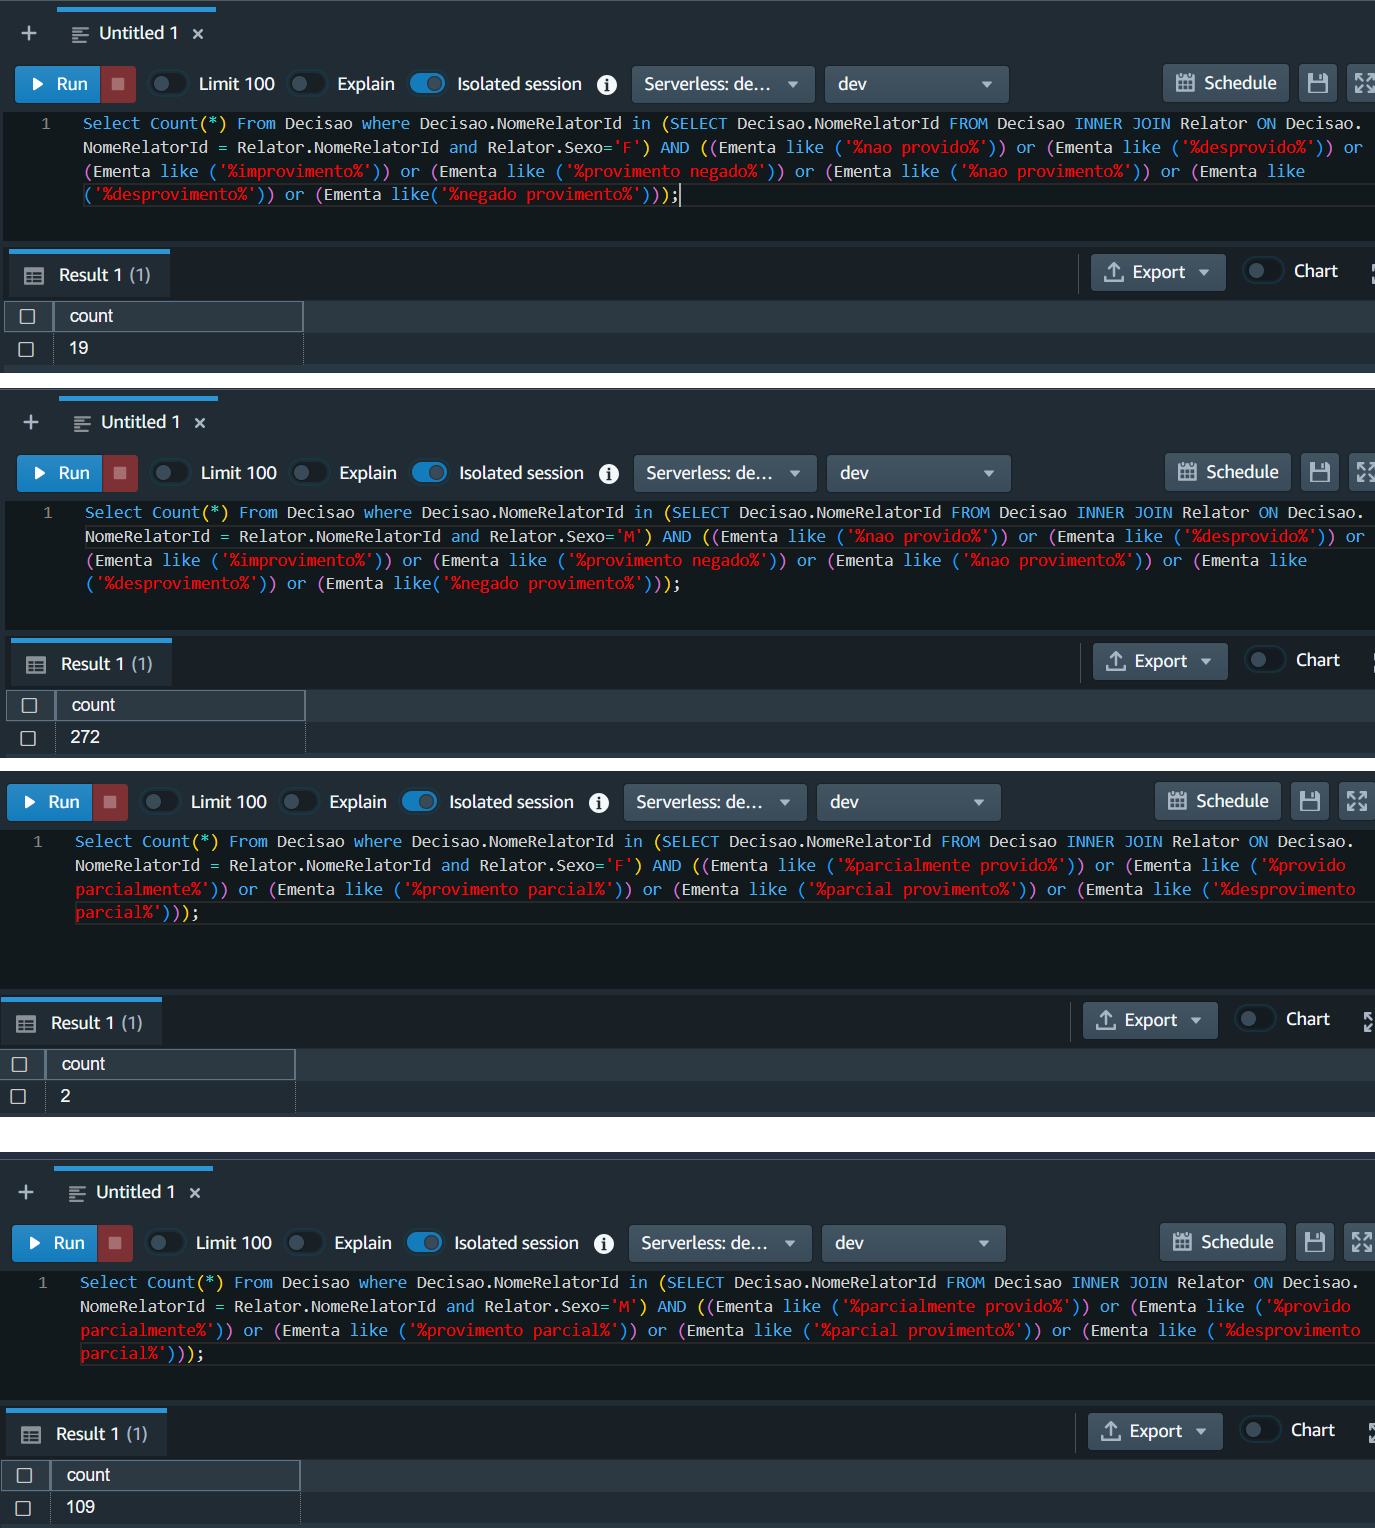


### 4.3. Respostas aos problemas sugeridos

Pode-se perceber que, em termos quantitativos, existe diferença na proporção de recursos defensivos providos por juízas e aqueles providos por juízes, porém, a diferença é pequena.

Na análise dos dados, é fundamental considerar a proporção entre o número de processos relatados por desembargadoras e os relatados por desembargadores. Lembremos que, do total de 532 processos, 510 tiveram sentença proferida por homens e 22, por mulheres. Nesse sentido, verificamos que:

*   Embora tivéssemos apenas 4% de juízas a proferir sentença para o subconjunto de 532 processos analisados, elas foram responsáveis por 6,5% da manutenção da condenação dos reus. Esse número é superior ao esperado, considerando um cenário em que homens magistrados negassem provimeto aos recursos na mesma proporção em que as magistradas.
*   No caso do provimento parcial, a diferença é mais significativa. Apenas 1,5% das setenças parcialmente providas foram dadas por mulheres, enquanto 98,5% foram acatadas parcialmente pelos magistrados homens. Conjectura-se a possibilidade de que os juízes do sexo masculino tenham maior abertura ao provimento parcial das apelações dos reus acusados de violência doméstica.
*   Considerando as apelações acatadas, 2% dos recursos foram aceitos por mulheres e 98%, por homens. Novamente temos uma diferença frente ao cenário esperado se houvesse igual frequência no provimento das apelações entre homens e mulheres.

Assim, para as perguntas levantadas na seção de objetivos, podemos dizer que:

1) O número de homens a julgar processos de violência doméstica contra a mulher é significativamente superior frente ao de juízas. Na amostra em que fizemos a análise, 96% dos processos tiveram sentença proferida por homens e apenas 4% por mulheres.

2) É possível cogitar a possibilidade de que o gênero do julgador influencie na decisão tomada. Do ponto de vista proprocional, tivemos mais desembargadores homens acatando parcial ou totalmente recursos dos acusados por violência doméstica. É certo, porém, que o desbalanceamento ocasionado pela quantidade muito reduzida de mulheres nos altos postos da magistratura dificulta a análise.

3) A maior parte das sentenças condenatórias dos reus (55%) é mantida na segunda instância. O número de recursos providos parcial ou integralmente é semelhante, de 21% e 24%, respectivamente.

### 4.4. Discussão final

Com esse trabalho, temos mais uma evidência da enorme subrepresentatividade das mulheres no poder judiciário. Esse resultado parece consistente com o que ocorre em outras côrtes do país. Em 15/09/2023, havia apenas 22% de mulheres na composição do STF (2 ministras em 11) e 18% no STJ (6 ministras em 33). Vale lembrar que, conforme o último censo demográfico, as mulheres correspondiam a maior parte da população brasileira, tendo mais de 51% de participação.

Não é possível afirmar com certeza que o gênero do julgador influencia no acolhimento dos recursos de acusados de violência doméstica. Numericamente, houve mais homens acatando parcial ou totalmente o recurso desses reus. Portanto, a hipótese permanece, embora seja necessário um Banco de Dados com número expressivamente maior de instâncias e, idealmente, mais balanceado para conclusões verdadeiramente robustas.

Percebe-se ainda que o evento mais comum é a manutenção da sentença condenatória. Nos últimos anos, nota-se um aumento da consciência social quanto aos problemas gerados pela violência contra a mulher e podemos conjecturar que os tribunais estejam mais sensíveis ao tema.

Como dissemos no início do estudo, nossos resultados são limitados por termos o caso de um tribunal específico e uma Base de Dados não tão expressiva como gostaríamos.

## 5. Auto-avaliação

O projeto desenvolvido teve pontos fortes, dentre eles, a montagem de uma base de dados original, por meio da coleta de dados com Web Scraping, C# e SQL Server. Em sentido amplo, foi bastante desafiador, o que também me ajudou a prosseguir na ideia.

Dentre os pontos fracos, estão a limitação de tamanho do Banco, devido, principalmente, à dificuldade que as ferramentas de pesquisa do tribunal impõem no momento de filtrar os processos de interesse. Senti dificuldade em chegar a conclusões mais firmes devido a não ter feito uma etapa de pré-processamento dos dados tão robusta quanto eu gostaria. Ainda assim, fiquei feliz com o resultado alcançado e acredito que a ideia do trabalho poderia ter continuidade, de alguma forma.